# Monte Carlo Method

## Prepare the packages

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
if "../" not in sys.path:
    sys.path.append("../") 

In [3]:
import math
from collections import defaultdict
import gym
from el_agent import ELAgent
from frozen_lake_util import show_q_value

## Define Monte Carlo Agent

In [4]:
class MonteCarloAgent(ELAgent):

    def __init__(self, epsilon=0.1):
        super().__init__(epsilon)

    def learn(self, env, episode_count=1000, gamma=0.9,
              render=False, report_interval=50):
        self.init_log()
        self.Q = defaultdict(lambda: [0] * len(actions))
        N = defaultdict(lambda: [0] * len(actions))
        actions = list(range(env.action_space.n))

        for e in range(episode_count):
            s = env.reset()
            done = False
            # 进行游戏，直到回合结束
            experience = []
            while not done:
                if render:
                    env.render()
                a = self.policy(s, actions)
                n_state, reward, done, info = env.step(a)
                experience.append({"state": s, "action": a, "reward": reward})
                s = n_state
            else:
                self.log(reward)

            # 估计各各种状态、行动
            for i, x in enumerate(experience):
                s, a = x["state"], x["action"]

                # 计算状态s对应的折现值
                G, t = 0, 0
                for j in range(i, len(experience)):
                    G += math.pow(gamma, t) * experience[j]["reward"]
                    t += 1

                N[s][a] += 1  # s, a 对的数量
                alpha = 1 / N[s][a]
                self.Q[s][a] += alpha * (G - self.Q[s][a])

            if e != 0 and e % report_interval == 0:
                self.show_reward_log(episode=e)

## Train Agent

In [5]:
def train():
    agent = MonteCarloAgent(epsilon=0.1)
    env = gym.make("FrozenLakeEasy-v0")
    agent.learn(env, episode_count=500)
    show_q_value(agent.Q)
    agent.show_reward_log()

At Episode 50 average reward is 0.0 (+/-0.0).
At Episode 100 average reward is 0.0 (+/-0.0).
At Episode 150 average reward is 0.9 (+/-0.3).
At Episode 200 average reward is 0.88 (+/-0.325).
At Episode 250 average reward is 0.9 (+/-0.3).
At Episode 300 average reward is 0.78 (+/-0.414).
At Episode 350 average reward is 0.88 (+/-0.325).
At Episode 400 average reward is 0.96 (+/-0.196).
At Episode 450 average reward is 0.86 (+/-0.347).


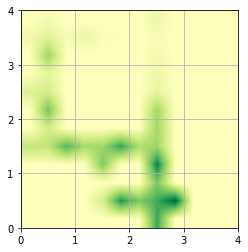

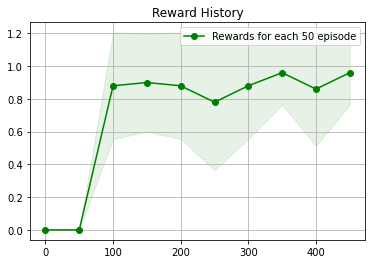

In [6]:
agent = train()